In [13]:
#imports
import matplotlib.pyplot as plt
import numpy as np

# Mechine Learning Definition
---
_"Field of study that gives computers the ability to learn without beging expilicty programmed."_ <br>~Arthur Samuel (1959)<br>
_"A computer program is said to learn from experience E with respect to some task T and some preformance measure P, if its preformence on T, as measured by P, improves with experiece E."_ <br> ~Tom Mitchell (1998)
<br>
### Supervised Learning
Given the _"right answers"_ for each example in the data 
__Regression:__ Predict continuous valued output
__Classification:__ Discrete valued output (0 or 1)
<br>
### Unsupervised Learning 
here is dataset can you finde some structure ex.(break same data type into two clusters) 
__Clustering__ used to  Organize Computing clusteres, Social network analysis, Market segmentation, Astronomical data analysis

# Univariate Linear Regression
---
##### Hypothesis:
$$h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$$
##### Taxonomy:
Training Set -> Learning Algorithm -> hypothesis(x) -> output: y
##### Notation:
m = Number of training examples<br>
n = Number of features<br>
x´s = "input" variable/features<br>
y´s = "output" variable/feaures<br>
$x^{(i)}$ = value x indexed with<br>
$x^{(i)}$ = input (features) of $i^{th}$ trainig example<br>
$x_j^{(i)}$ = value of feature $j$ in $i^{th}$ training example

<br><br>

## Cost function
---
##### Idea:
Choose $\theta_0$,$\theta_1$ so that $h_\theta (x)$ is close to $y$ for our traning examples $(x,y)$
<br><br>
##### Goal: 
$\binom{minimize}{\theta_0,\theta_1}$ $J(\theta_0,\theta_1)$ => Squared error Cost function
<br><br>
##### Algorithm:
$$J(\theta_0,\theta_1) = \frac{1}{2m} \sum\limits_{i=1}^m(h\theta_0(x^{(i)})-y^{(i)})^2$$

__$$h_\theta(x)$$__
(for fixes $\theta_1$, this is a function of $x$)

IndexError: list index out of range

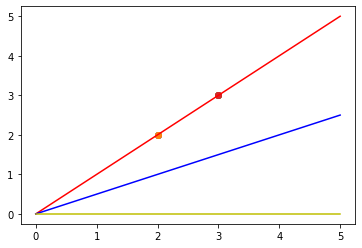

In [14]:
fig = plt.figure()
points = [[1,1],[2,2],[3,3]]
ax = fig.add_subplot(1,1,1)
x = np.linspace(0,5,100)
plt.plot(x,x*1, "-r", label="y = 1x") # best fit
plt.plot(x,x*0.5, "-b", label="y = 0.5x")
plt.plot(x,x*0,"-y",label="y = 0x")
for lt in points:
    for x in lt:
        plt.scatter(points[x],points[x])
plt.xlabel("x", color="r")
plt.ylabel("y", color="r")
plt.grid()
plt.legend(loc="upper left")
plt.show()

__$$J(\theta_1)$$__
(function of the parameter $\theta_1$) so define the slope value in this example and slope is calulatet as you know from the school <br>
corresponds to value of $\theta_1 => y = x^2 + 1$ for the minimalization, so the best is 1 since it is the lowest point of parabola 
<br>$\binom{minimize}{\theta_1}$ $J(\theta_1)$

## Gradient Descent
---
##### Def:
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of __steepest descent__ as __defined__ by the negative of the __gradient__. <br>
• Need to choose $\alpha$ <br>
• Needs many iterations <br>
• Workd well even when $n$ is large e.g $n = 10^6$
<br><br>
##### Idea:
Init with some $\theta_0, \theta_1$ and keep changing $\theta_0, \theta_1$ to reduce $J(\theta_0,\theta_1)$ till return the minimum.
<br><br>
##### Goal: 
Return the $\binom{min}{\theta_0,\theta_1} J(\theta_0,\theta_1)$ thus find the __Local Optimum__
<br><br>
##### Algorithm
$\color{purple}{def}$repeat until convergence{ 

$$\theta_j := \theta_j-\alpha\frac{\delta}{\delta\theta_j} J(\theta_0,\theta_1)$$

<br>

$$\frac{\delta}{\delta\theta_j}\color{green}{J(\theta_0,\theta_1)} = \frac{\delta}{\delta\theta_j}*\color{green}{\frac{1}{2m}\sum_\limits{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2}$$

<br>

$$\theta_0 := \theta_0-\alpha \color{yellow}{\frac{1}{m}}\color{#2180ac}{\sum_\limits{i=1}^m (h_\theta (x^{(i)}) -y^{(i)}}) * x^{(i)}$$

$$\color{yellow}{\frac{\delta}{\delta\theta_1}} \color{#2180ac}{J(\theta_0,\theta_1)} * x^{(i)}$$
<br>
<br>
    
 } (for j = 0 and j = 1) <=> __Simultaneously__ update $\theta_0$ and $\theta_1$ // blue = slope; green = minimalize; $\alpha :=$ __learning rate__ step sizes<; on yellow you can cross out the $\delta$; IMPORTANT yellow and blue denote one vector
<br>
For fixes $\alpha$ rate: As approach to local minimum, gradient descent steps become smaller automatically, so no need to decrease $\alpha$ over time
<br><br>
##### Vectorized the Equation
<img src="pic/GD Overview.png">
<br><br>
##### "Batch" 
Each step of gradient descent uses al lthe training examples, thus the sum of training examples.

In [ ]:
points = [(2,4),(4,2)]
def F(w):
   return sum((x * x - y)**2 for x, y in points)
def dF(w):
   return sum(2*(x*y-y)*x for x, y in points)
# Gradient descent
w = 0
eta = 0.01
for t in range(100):
   value = F(w)
   gradient = dF(w)
   w = w -eta * gradient
   print("iteration {}: w = {}, F(w) = {}".format(t,w,value))

## Multivariate Linear Regression
---
##### Hypothesis:
$$h_\theta(x) = \theta_0+\theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n => \theta^Tx$$
<br><br>
##### Algorithm:
Repeat{$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_\limits{i=1}^m(h_\theta(x^{(i)}-y^{(i)})x_j^{(i)}$$
} simultaneously update $\theta_j$ for j = 0,...,n)
<br><br>
##### Features Scaling:  
##### Mean normalization:
Replace $x_i$ with $x_i-\mu_i$ to make features have approximately zero mean (Do not apply to $x_0 = 1$)<br>
$x_1 \leftarrow \frac{x_1-\mu_1}{s_1}$; where $\mu$ is avg. value of x in traning set; $s$ is ragne, so (max-min)
<br>
$x_1 = \frac{x_1-1000}{2000}$<br>
$x_2 = \frac{\text{x_2} - 2}{5}$<br>
$\therefore -0.5 <= x_1 <= 0.5; -0.5 <= x_2 <= 0.5$<br>
Gradient work correctly if after each iter of $\binom{min}{\theta}$J($\theta$) the __value should decrease__ if not you should use lower __learning rate $\alpha$__;<br>
Threshold of iter vary for each case, so Do automatic convergence test function to ensure.<br>
For sufficently small $\alpha$, the $J(\theta)$ should decrease on each iteration<br>
• If $\alpha$ is too small, then slow convergence<br>
• If $\alpha$ is too large, then $J(\theta)$ may not decrease on each iternation; may not converge. <br>
• Choose $\alpha$ as $3\times$ multiplier<br>
__Debug:__ ploting that $J(\theta)$ as the number of Interation.<br>
<br>

##### Polynomial Regression
• Try to combinate the adquate features into one.
• Use vary of function in the equation<br>
$h_\theta(x) = \theta_0+\theta_1(x)+\theta(x)^2 $
<br>
$ h_\theta(x) =\theta_0+\theta_1(x)+\theta_2\sqrt{(x)}$ 
<br>etc.<br>

##### Normal Equation _(for non-linear problem, use GD)_
Method to sove for $\theta$ analytically. <br>
• No need to choose $\alpha$ <br>
• Do not need to iterat <br>   
• Slow if $n$ is very large e.g after n=10000 <br>

$$\theta = (X^T X)^{-1} X^T y$$<br>

$m$ __examples__ $(x^{1},y^{1},...,(x^{(m)},y^{m})$ <br>while $n$ __features__
where: <br>X is $m\times(n+1)$ matrix, so X =\begin{bmatrix}
-& (x^{1})^T &-\\
-& (x^{2})^T &-\\
-& (x^{m})^T &-\\
\end{bmatrix} <br>
<br> 
If $X^T X$ is non-invertible, then caused by:<br>
• Redundant features (linearly dependent)
    - e.g. x_1 = size in feet^2
           x_2 = size in m^2
• Too many features (e.g. $m <= n$)
    - Deltete some features, or use regularization